<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/adiyasan/pembelajaranmesinlanjut/fashion_classification.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/adiyasan/pembelajaranmesinlanjut/fashion_classification.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

# Copyright Information

In [ ]:
# Copyright 2022 MIT 6.S191 Introduction to Deep Learning. All Rights Reserved.
# 
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of 6.S191 must
# reference:
#
# © MIT 6.S191: Introduction to Deep Learning
# http://introtodeeplearning.com
#

# 1: Fashion MNIST Classification

Dalam tugas ini, saya akan membangun dan melatih sebuah convolutional neural network (CNN) untuk masalah klasifikasi citra fashion dari dataset terkenal [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/). Fashion MNIST dataset terdiri dari 60,000 citra training and 10,000 citra test. Kelas terdiri dari 10 kategori fashion yaitu:
<table>
<thead>
  <tr>
    <td><strong>Label</strong></td>
    <td><strong>Deskripsi</strong></td>
  </tr>
</thead>
<tbody>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody>
</table>

In [ ]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0

     |████████████████████████████████| 2.1 MB 4.2 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115442 sha256=c48ffd7543096dd6d3b3babce7ffdc90c1dafbd26498b551999ddaa50fecb5bc
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning


## 1.1 Fashion MNIST dataset 

Mari kita download dan load dataset dan display sedikit sampel random darinya:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

4431872/4422102 [==============================] - 0s 0us/step


Training set kita dibuat dari 28x28 citra grayscale dari citra fashion. 

Mari visualisasikan beberapa citra tersebut dan label yang bersesuaian dengannya.

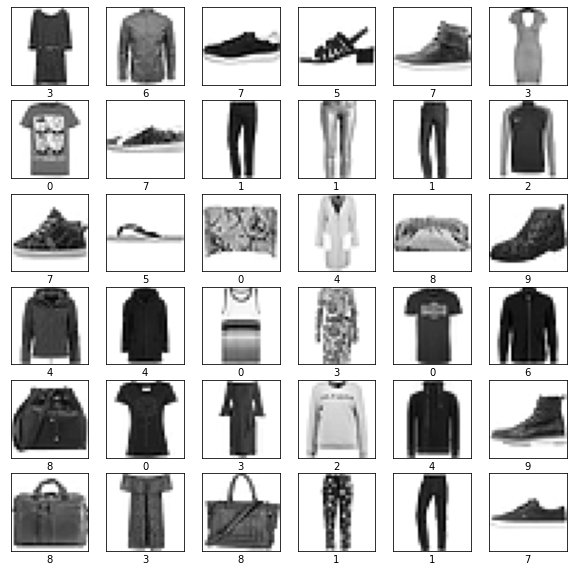

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

## 1.2 Convolutional Neural Network (CNN) untuk klasifikasi citra fashion

Convolutional neural network (CNNs) sangat cocok untuk berbagai tugas dalam computer vision. Berdasarkan hasil experiment yang saya lakukan didapatkan bahwa arsitektur CNN yang optimal terdiri dari dua lapisan convolutional dan lapisan pooling, diikuti oleh dua lapisan fully connected, dan akhirnya menghasilkan distribusi probabilitas 10 kelas fashion (0-9). Arsitektur CNN yang dibangun digambarkan seperti di bawah ini:

![alt_text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/convnet_fig.png "CNN Architecture for MNIST Classification")

### Mendefinisikan model CNN

Untuk melakukan ini, saya menggunakan dua lapisan convolutional [`keras.layers.Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) dan pooling [`keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D). Masing-masing lapisan convolutional memiliki filter 24 dan 36 secara berurutan dan ukuran filter/kernel nya adalah 3x3 untuk semua lapisan. Sementara itu ukuran pool adlah 2x2 dengan 128 unit hidden neuron di layer fully connected yang berjumlah 1 layer saja. Fungsi aktivasi di masing-masing layer convolutional dan fully connected menggunakan ReLU sedangkan di layer output menggunakan Softmax. 

In [ ]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''') 

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''')

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # [TODO Dense layer to output classification probabilities]
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 24)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 900)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

### Latih dan uji model CNN

Sekarang, disini saya mendefinisikan fungsi loss, optimizer, dan metrics melalui metode `compile`. Berdasarkan hasil experiment didapatkan bahwa fungsi loss dan optimizer yang optimal adalah Sparse Categorical Crossentropy dan Adam.

In [ ]:
'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# cnn_model.compile(optimizer='''TODO''', loss='''TODO''', metrics=['accuracy']) # TODO
# reference: https://keras.io/api/optimizers/

Disini saya melatih model CNN menggunakan metode `fit` melalui Keras API. Epochs yang paling optimal berdasarkan hasil experiment adalah 5.

In [ ]:
'''TODO: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
BATCH_SIZE = 64
EPOCHS = 5

cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
# cnn_model.fit('''TODO''')

Epoch 1/5
938/938 [==============================] - 8s 6ms/step - loss: 0.5322 - accuracy: 0.8088
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.3510 - accuracy: 0.8731
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.3029 - accuracy: 0.8901
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2726 - accuracy: 0.9004
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2500 - accuracy: 0.9083


Disini saya melakukan evaluasi model hasil training mengunakan dataset pengujian menggunakan metode [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#evaluate):

In [ ]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
# test_loss, test_acc = # TODO

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2895 - accuracy: 0.8939
Test accuracy: 0.8938999772071838


### Membuat prediksi dengan model CNN

Dengan model yang terlatih, kita dapat menggunakannya untuk membuat prediksi tentang beberapa citra. Pemanggilan fungsi [`predict`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#predict) menghasilkan prediksi output yang diberikan sekumpulan sampel input.

In [ ]:
predictions = cnn_model.predict(test_images)

Dengan pemanggilan fungsi ini, model telah memprediksi label untuk setiap gambar dalam set pengujian. Mari kita lihat prediksi untuk gambar pertama di dataset uji:

In [ ]:
predictions[0]

array([3.3511665e-06, 8.5644594e-08, 1.9996278e-07, 6.8956766e-08,
       9.9595354e-08, 5.6927250e-04, 6.7866978e-08, 1.1310673e-03,
       5.2003916e-06, 9.9829060e-01], dtype=float32)

Seperti yang Anda lihat, variabel predictions berisi array 10 angka. Angka-angka ini menggambarkan "keyakinan" model bahwa citra sesuai dengan masing-masing dari 10 kelas fashion yang berbeda.

Kita dapat melihat fashion yang memiliki kepercayaan tertinggi untuk citra pertama di dataset uji:

In [ ]:
'''TODO: identify the digit with the highest confidence prediction for the first
    image in the test dataset. '''
prediction = np.argmax(predictions[0]) 
# prediction = # TODO

print(prediction)

9


Jadi, model paling yakin bahwa citra ini adalah "9". Kami dapat memeriksa label tes (ini adalah identitas sebenarnya dari fashion) untuk melihat apakah prediksi ini benar:

Label of this fashion is: 9


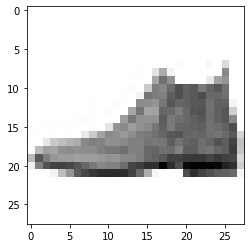

In [ ]:
print("Label of this fashion is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

Mari kita visualisasikan hasil klasifikasi pada dataset fashion MNIST. Saya akan memplot gambar dari kumpulan data pengujian bersama dengan label prediksinya, serta histogram yang memberikan probabilitas prediksi untuk setiap fashion:

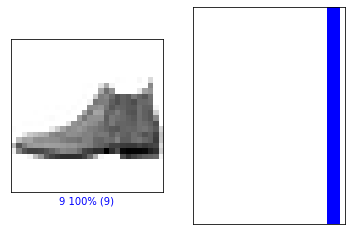

In [ ]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 0 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

Saya juga dapat memplot beberapa citra beserta prediksinya, di mana label prediksi yang benar berwarna biru dan label prediksi yang salah berwarna abu-abu. Angka tersebut memberikan persen kepercayaan (dari 100) untuk label yang diprediksi.

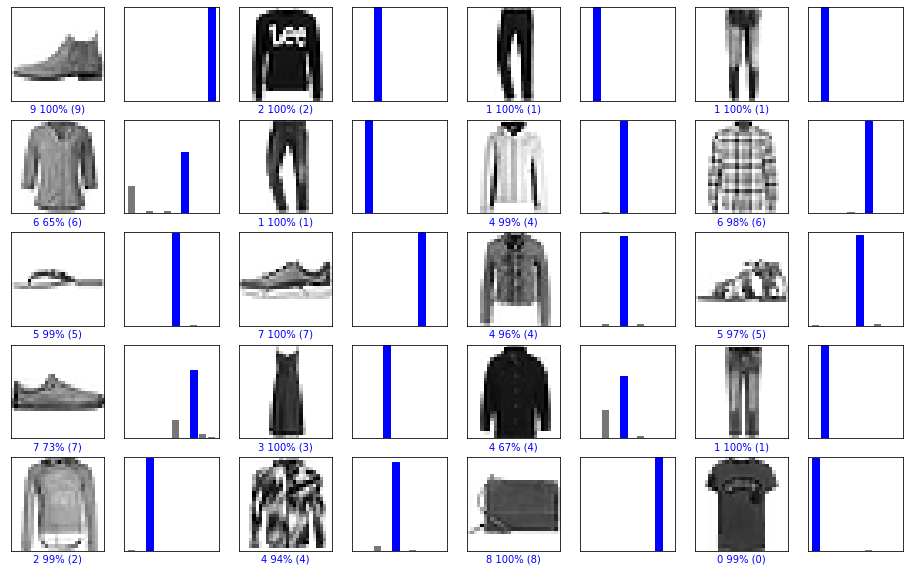

In [ ]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)


## 1.3 Kesimpulan

Model yang dibangun dalam experiment terbukti handal untuk menyelesaikan masalah klasifikasi citra fashion MNIST. Setting hyperparameter telah mendapatkan kesimpulan bahwa parameter-parameter berikut adalah best parameter :
<table>
<thead>
  <tr>
    <td><strong>Parameter</strong></td>
    <td><strong>Value</strong></td>
  </tr>
</thead>
<tbody>
  <tr>
    <td>Jml. Conv. Layer</td>
    <td>2</td>
  </tr>
  <tr>
    <td>Jml. Filter di Conv. Layer</td>
    <td>24, 36</td>
  </tr>
  <tr>
    <td>Ukuran. Filter di Conv. Layer</td>
    <td>3x3, 3x3</td>
  </tr>
  <tr>
    <td>Hidden Unit</td>
    <td>128</td>
  </tr>
  <tr>
    <td>Optimizer</td>
    <td>Adam</td>
  </tr>
  <tr>
    <td>Learning Rate</td>
    <td>0.001 (default)</td>
  </tr>
  <tr>
    <td>Loss Function</td>
    <td>Sparse Categorical Crossentropy</td>
  </tr>
  <tr>
    <td>Epoch</td>
    <td>5</td>
  </tr>
</tbody>
</table>